In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
warnings.filterwarnings("ignore")

/kaggle/input/students-data-analysis/Students data.csv


### Loading data

In [2]:
data = pd.read_csv('../input/students-data-analysis/Students data.csv')
data.set_index('ID', inplace = True)
data.head()

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


### Data preparation
See: https://www.kaggle.com/anastasiiabaturinets/students-data-analysis-primary-analysis
1. Rename columns
2. Exclusion of abnormal values
3. Encoding  features
4. Split data

In [3]:
data.rename(columns={'from1':'home_location', 'from2': 'pref_on_math', 'from3': 'how_apply', 'from4': 'wealth_level'}, inplace = True)
data.head()

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,home_location,pref_on_math,how_apply,wealth_level,y
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [4]:
data = data.loc[((data['GPA'] > 67) & (data['Calculus1'] > 40) & (data['Calculus2'] > 30) & (data['Statistics'] > 55) & (data['Probability'] > 50) & (data['Functional_analysis'] > 40) & (data['wealth_level'] != 3))]
data.head()

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,home_location,pref_on_math,how_apply,wealth_level,y
ID,,,,,,,,,,,,,,,,
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
1147,A,male,4,77.11,60,43,52,63,71,72,75,G,A,A,0,1
1149,B,female,5,77.92,61,60,66,68,80,78,71,I,B,A,0,0
1150,A,female,5,76.50,60,61,60,69,73,60,62,H,B,A,0,0


In [5]:
data['gender'].replace({'female':0, 'male': 1}, inplace = True)
data['pref_on_math'].replace({'A':0, 'B': 1}, inplace = True)
data['class'].replace({'A':0, 'B': 1}, inplace = True)
#replace values of 'how_apply' to frequency 
encode_apply = dict(data['how_apply'].value_counts())
for key, value in zip(encode_apply.keys(), encode_apply.values()) :
    data['how_apply'].replace(key, value, inplace = True)
data.drop(['home_location'], axis=1, inplace=True)
data = data.astype({'class': 'int64', 'gender': 'int64', 'pref_on_math': 'int64'})
data.insert(len(data.columns)-1, 'y', data.pop('y'))
data.head()

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,pref_on_math,how_apply,wealth_level,y
ID,,,,,,,,,,,,,,,
1143,0,0,2,74.56,47,48,71,60,61,68,64,0,78,0,1
1145,0,0,1,70.11,49,45,63,60,66,66,61,0,78,0,0
1147,0,1,4,77.11,60,43,52,63,71,72,75,0,78,0,1
1149,1,0,5,77.92,61,60,66,68,80,78,71,1,78,0,0
1150,0,0,5,76.50,60,61,60,69,73,60,62,1,78,0,0


In [6]:
features = list(data.columns)
features.pop(-1)
y = data.loc[:,['y']]
x = data.loc[:, features]
train, val_test, train_lbl, val_test_lbl = train_test_split( data.loc[:, features], data.loc[:,['y']], test_size=0.2, random_state=0)
val, test, val_lbl, test_lbl = train_test_split( val_test, val_test_lbl, test_size=0.5, random_state=0)

Diagram of class balance in training data

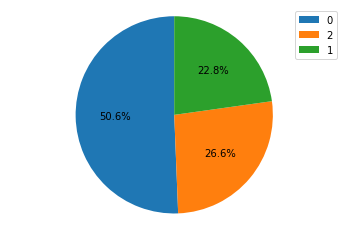

In [7]:
labels = dict(train_lbl['y'].value_counts()).keys()
sizes = dict(train_lbl['y'].value_counts()).values()
plt.pie(sizes,  autopct='%1.1f%%', startangle=90)
plt.legend(labels = labels)
plt.axis('equal');

### Classification with default params

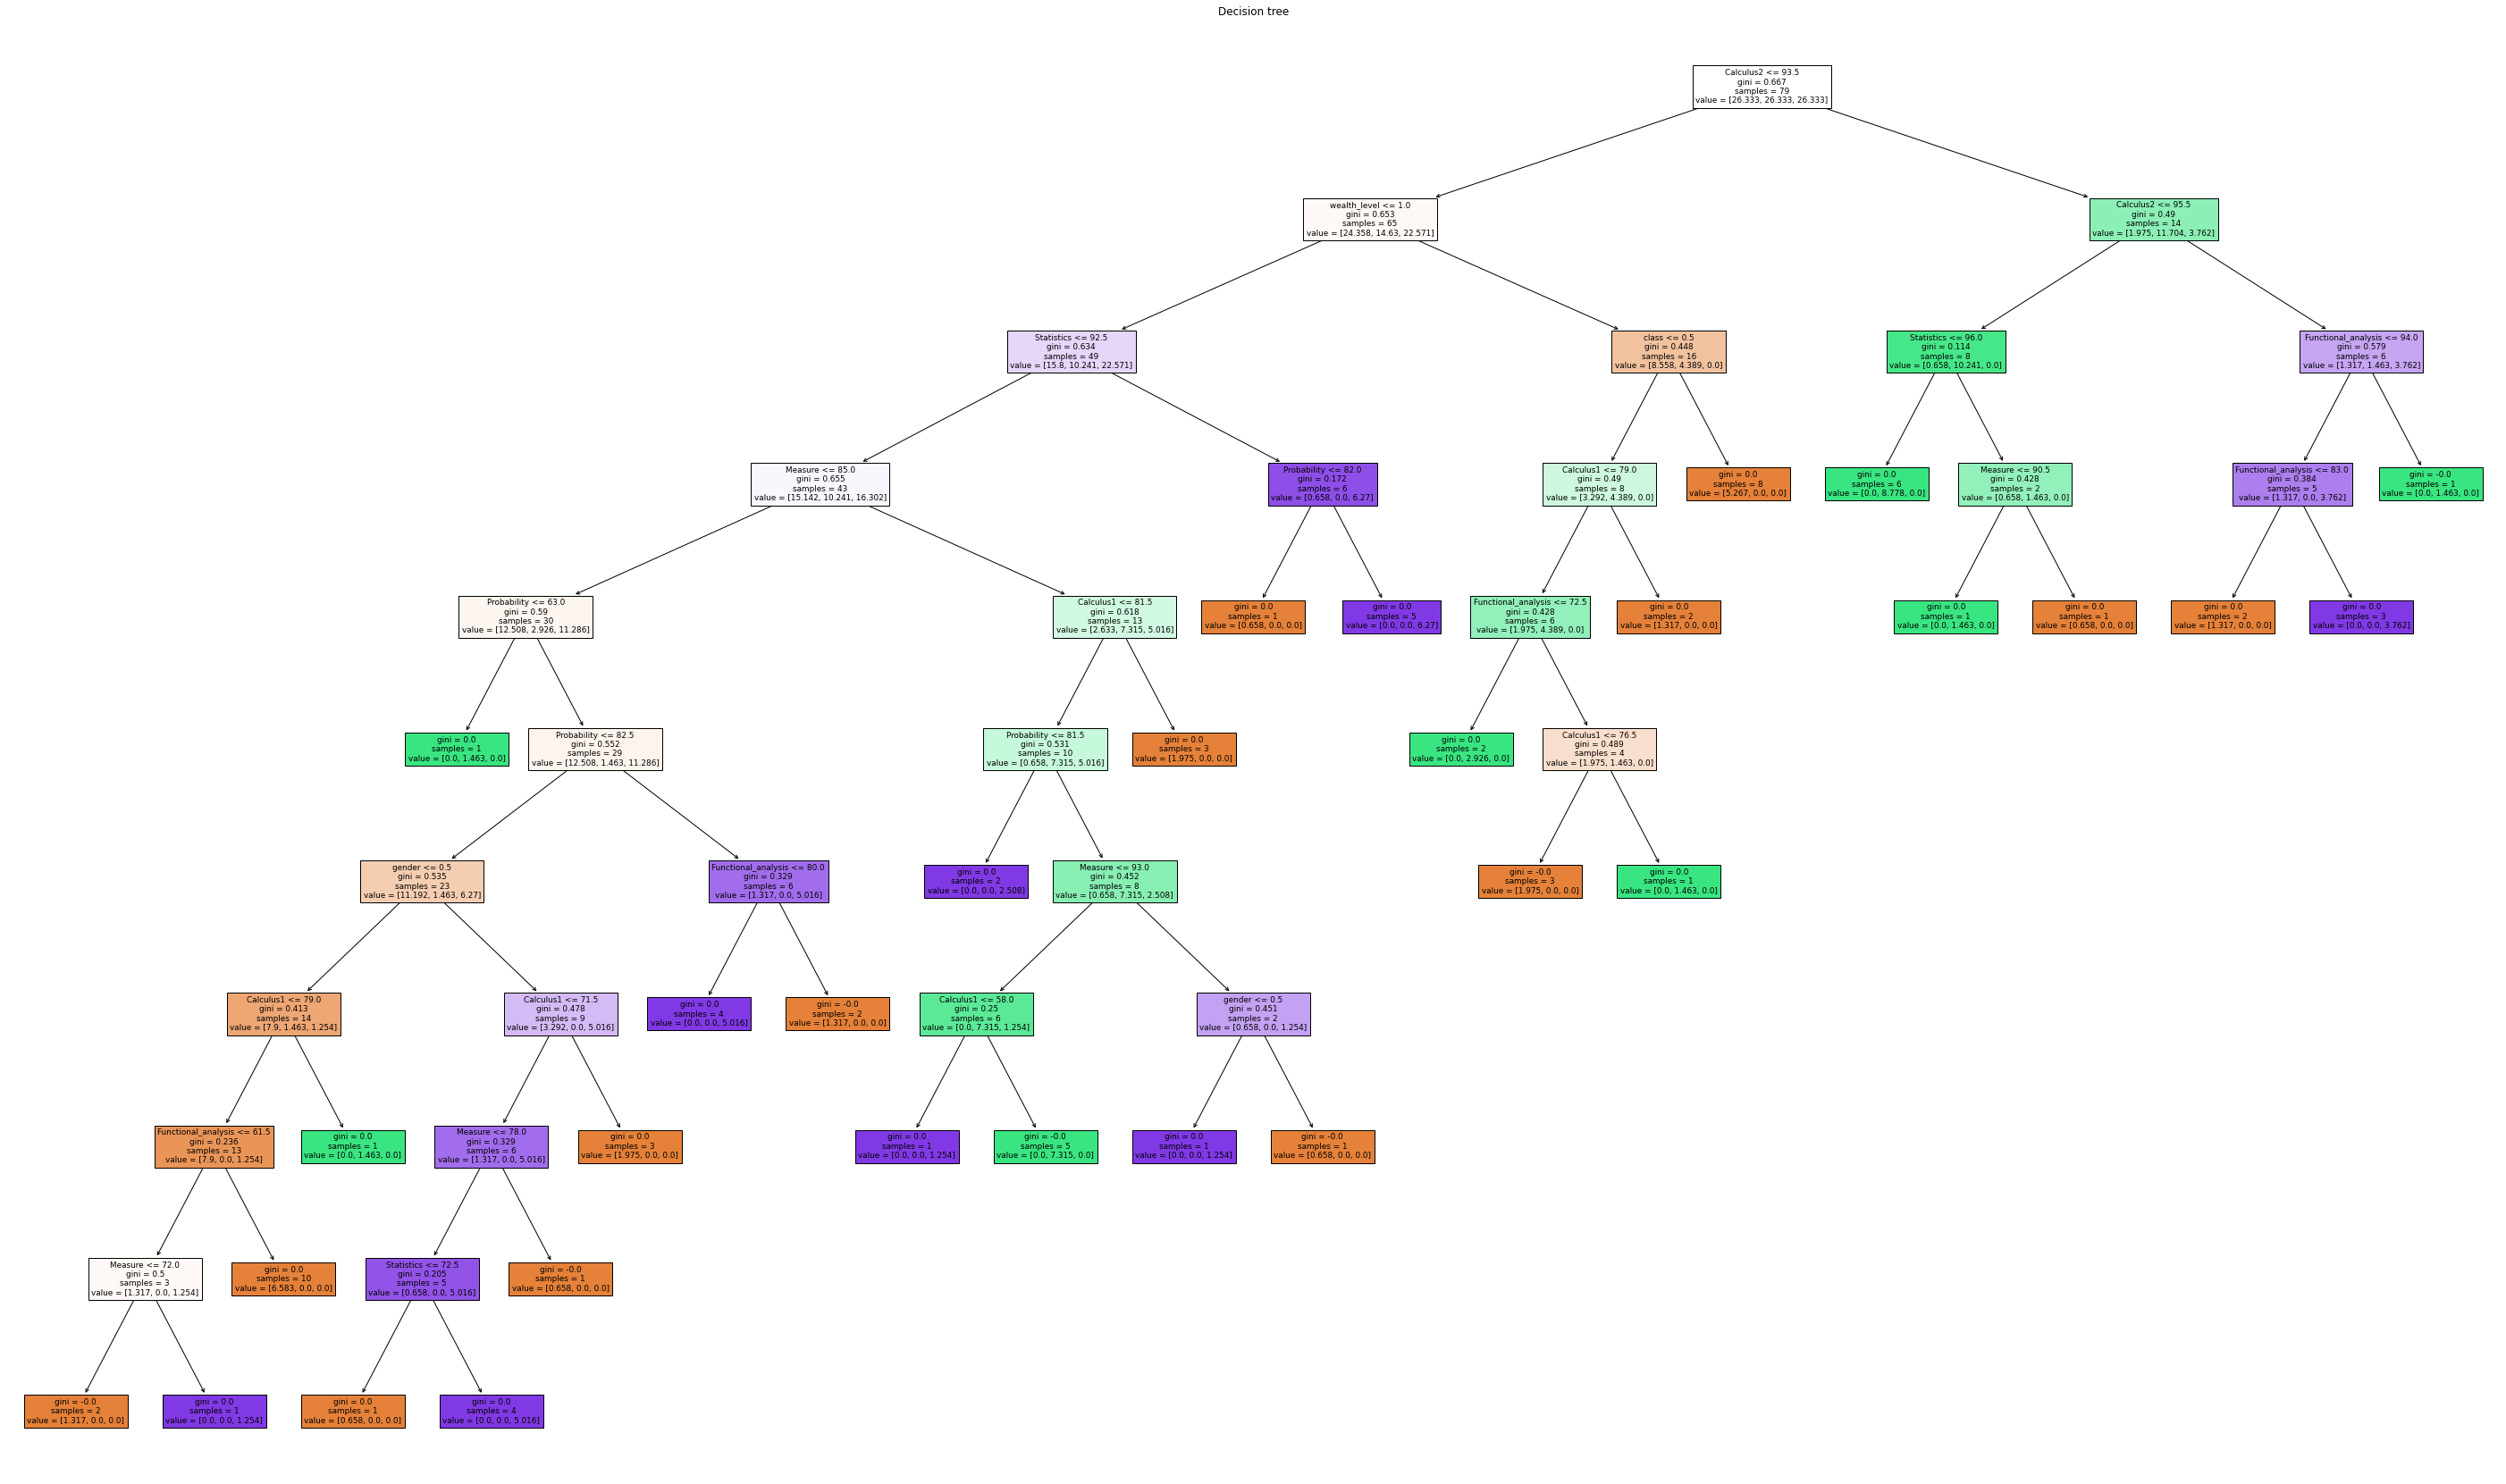

In [8]:
clf = tree.DecisionTreeClassifier(class_weight = 'balanced').fit(train, train_lbl)
plt.figure(figsize = (50, 30))
tree.plot_tree(clf,  feature_names= train.columns, filled=True)
plt.title("Decision tree");

1.0
0.3
0.4


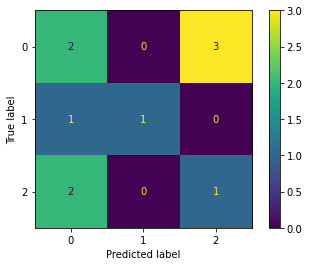

In [9]:
print(clf.score(train, train_lbl))
print(clf.score(val, val_lbl))
print(clf.score(test, test_lbl))
predicted = clf.predict(test)
cm = confusion_matrix(test_lbl, predicted)
cm_display = ConfusionMatrixDisplay(cm).plot()